# Group 3 BCC800 EDA

## Introduction

This project aims to develop a music recommendation system tailored to individuals’ user playlists on Spotify by leveraging a comprehensive dataset that contains track metadata retrieved from Kaggle.  To obtain a user’s playlist, Spotify’s Wed API will be connected via the Spotipy Python library. The proposed approach involves vectorizing text-based variables, creating a unified numerical data frame, and employing similarity measures like cosine similarity. The system will generate personalized recommendations by comparing track feature similarities in the track data frame and a user’s playlist. The toolkit employed includes Python libraries such as Pandas, Scikit-learn, Spotipy, and Matplotlib. By addressing challenges and leveraging innovative methodologies, this project aims to redefine the music discovery experience, ensuring accurate, diverse, and ethical recommendations for Spotify users.

## Background

Businesses in the music industry could benefit from the technical advances of this project by encouraging music streaming service engagement by offering tailored music recommendations, resulting in increased user retention. A platform that can understand and predict user preferences is likely to better attract and retain more users compared to competitors.  Additionally, recommendation systems can expose artists to a wider audience by suggesting their music to users who may not have otherwise come across their work if the artists’ music contains user playlist feature similarities. Insights gained from track suggestions can effectively promote an artist’s new releases by showcasing them to users who have shown interest in similar genres or artists.  Artists, labels, and stakeholders can gain valuable insights into their listener preferences, demographics, and geographical locations to influence marketing and touring strategies.

## Objectives

The project aims to answer the following questions:
*   What additional songs are like the ones that the user has enjoyed?
*   What additional songs are like the ones that the user has enjoyed?
*   How can the system balance suggesting familiar favorites and introducing new and diverse music?
*   Despite overall playlist genre, can the system recommend music that crosses genres, expanding the user’s music preferences?

This project will utilize a data set that contains 19 track features of over 1 million tracks. From this data, through descriptive analysis the following questions will be explored:
*   How has the distribution of music genres changed from 2000 to 2023?
*   Are there specific genres that have gained or lost popularity over the years?
*   Which artists have the highest average popularity measures?
*   Are there any features, such as musical positiveness, tempo, key, presence of vocals, presence of an audience, related to high popularity measures?
*   Are there significant correlations between features, such as
danceability vs musical positiveness, presence of vocals vs intensity and genre vs acoustic nature?

In the digital landscape of music streaming services, users are faced with an overwhelming abundance of choices, making the exploration of new music that is tailored to individual preferences a daunting task. Recognizing the growing need for personalized music recommendations, this project aims to address the technical challenges that exist within this landscape.  The primary focus involves the development of a music recommendation system to alleviate the laborious process users face when navigating through extensive music libraries.

## Data

This dataset was downloaded from the [Spotify_1Million_Tracks](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks?resource=download) webpage on www.kaggle.com, which was extracted from the Spotify platform using the [Spotipy Python library](https://spotipy.readthedocs.io/en/2.22.1/) via API connections. It contains around 1 million tracks from more than 60 thousand distinct artists, which released between 2000 to 2023 and represent more than 80 genres. The variables are organized by a unique track ID column that identifies each song. There are 19 features in the providing important track metadata:
<br><br>

| Feature Name | Description | Range |       
| :---------- |:---------- | :---------- |
| artist_name | Name of the artist | |
| track_name | Track or record name | |
| track_id | Unique id from Spotify for a track | |
| popularity | Track popularity | 0 to 100 |
| year  | Released year | 2000 to 2023 |
| genre | Genre type of the song | |
| danceability | Track suitability for dancing |  0.0 to 1.0 |
| energy | Measure of intensity and activity  | 0.0 to 1.0 |
| key | The key track is in | 0 to 11 |
| loudness | Loudness in decibels range | -60 to 0 db|
| mode | Modality of the track | 1: Major; 0: Minor |
| speechiness | Presence of words in the track | 0 to 1 |
| acousticness | Confidence measure to declare if track is acoustic | 0 to 1 |
| instrumentalness | Whether track contains vocals | 0 to 1 |
| liveness | Presence of audience in the recording | 0.0 to 1.0 |
| valence | Musical positiveness | 0.0 to 1.0 |
| tempo | Tempo of tracks in beats per minute | 0.0 to 250 |
| duration_ms  | Duration of track in milliseconds | 0 to 6.0 ms |
| time_signature  | Estimated time signature | 3 to 7 |

## Proposed Solution

The proposed approach involves leveraging vectorization techniques (Term Frequency - Inverse Document Frequency) on text-based variables within the dataset to create a unified numerical representation for all songs. This process facilitates the transformation of diverse textual features (genre, artist name, track title, etc.) into a normalized, vectorized data frame alongside initial numeric features (loudness, liveliness, valence, etc.). The user's playlist information will be extracted through Spotify's wed API connection using the Spotipy Python library. Track metadata matching the Spotipy_1Million_Tracks dataset will be extracted using the Spotipy API functions (audio_features()). Like the above data frame, textual metadata will be vectorized using text vectorization techniques to create a normalized, vectorized playlist.  If a user's playlist exhibits a general theme, a single vector will be generated based on some average techniques (mean, for example) to create a playlist "barcode" that describes the user's playlist as a whole. Each song in the Spotify_1Million_Tracks data frame will be compared to the user playlist vector using a similarity measure (cosine, Jaccard, etc.). The top N songs based on the similarity scores will then be tailored recommendations.

The results of these recommendations will be evaluated in accordance with the Spotfiy 1 Million Dataset Challenge, (AIcrowd, 2024) utilizing R-precision to calculate the number of retrieved relevant tracks (R<sub>1:|G|</sub>) divided by the number of known relevant tracks (|G|) (Bennette, 2018):

$$ R-precision = \frac{|G ∩ R_{1:|G|}|}{|G|} $$

## Importing Libraries

In [ ]:
# Install Libraries
# !pip install import_ipynb
# !pip install cred
# !pip install spotipy

In [2]:
import pandas as pd
import seaborn as sns
import re
import sys
import numpy as np
#import import_ipynb
#import cred

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

#import spotipy
#from spotipy.oauth2 import SpotifyOAuth
#from spotipy.oauth2 import SpotifyClientCredentials
#import spotipy.util as util

import matplotlib.pyplot as plt

from skimage import io

from sklearn.metrics.pairwise import cosine_similarity

## Exploratory Data Analysis

In [4]:
path="spotify_data.csv"
df_spotify=pd.read_csv(path)

### Dataframe Review

In [ ]:
df_spotify.shape

(1159764, 20)

In [ ]:
# Review the columns and data types
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [ ]:
# Review dataframe
df_spotify.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [ ]:
# Check for empty values
df_spotify.isnull().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
# Missing Artists
missing_artist_num = len(df_spotify[df_spotify['artist_name'] == 'None'])
print('Number of songs with missing artists:', missing_artist_num)
df_spotify[df_spotify['artist_name'] == 'None']

Number of songs with missing artists: 15


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
256971,256971,None,Cold,10eyeJsKDh26SKEBvSfuBG,17,2017,black-metal,0.2120,0.7080,7,-6.932,1,0.2180,0.000201,0.906,0.1430,0.0381,126.739,717237,4
256972,256972,None,Wither,6xz1O7tOw6Tdvzc3Ev1isc,16,2017,black-metal,0.3170,0.5180,9,-7.418,1,0.0650,0.000258,0.855,0.7290,0.0747,110.958,525099,4
257024,257024,None,Suffer,6hedSqpvIaW0GzrqJnq32D,14,2017,black-metal,0.1090,0.1420,2,-11.807,0,0.0439,0.154000,0.879,0.1050,0.0350,57.422,565664,3
313028,313028,None,"A World, Dead and Gray",7shu4LrpMTsGwa8YotA1My,26,2018,black-metal,0.3770,0.5070,7,-14.889,1,0.0448,0.000103,0.931,0.2110,0.3380,113.917,466182,4
313050,313050,None,Hypoxic,3V8qpQnLVhu82ZvC4Ja8VG,24,2018,black-metal,0.3410,0.4260,11,-17.450,0,0.0496,0.038000,0.848,0.1130,0.0404,66.628,418945,4
313063,313063,None,Bed the Cold Earth,68w6nJMmA9Ui6zV7qXrwIt,22,2018,black-metal,0.1650,0.4610,10,-16.267,1,0.0378,0.001410,0.789,0.1030,0.1220,72.501,464632,4
313117,313117,None,Life Is Long Enough,1NJ8HTD5syI65EJmXUckxB,20,2018,black-metal,0.1800,0.1400,7,-18.017,0,0.0440,0.230000,0.925,0.1110,0.0357,86.924,476152,4
313153,313153,None,Corroded,4zcJ5p91PSG3vDsGJfENDd,17,2018,black-metal,0.1490,0.1440,2,-21.518,0,0.0321,0.771000,0.859,0.1120,0.0398,85.413,317214,4
313174,313174,None,Desiderate,6375ZIE3Pi8BuZOuy8f6g1,16,2018,black-metal,0.1630,0.3210,7,-17.123,0,0.0411,0.148000,0.324,0.1140,0.0535,66.017,472719,4
313225,313225,None,Where Life Should Be,0VCAJwhy4p3tVaGUSnaWGr,15,2018,black-metal,0.1910,0.1630,0,-15.242,0,0.0378,0.102000,0.907,0.0875,0.0383,137.785,530210,3


In [ ]:
# Missing Track Name
missing_trackname_num = len(df_spotify[df_spotify['track_name'] == 'None'])
print('Number of songs with missing track name(s):', missing_trackname_num)
df_spotify[df_spotify['track_name'] == 'None']

Number of songs with missing track name(s): 1


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
879020,1048553,The Duskfall,None,2Q5cMgzptSupzvvWtZTyVg,8,2005,swedish,0.366,0.942,7,-5.425,1,0.0882,0.000006,0.0219,0.129,0.0724,88.689,281533,4


In [5]:
# Drop unnecessary columns
df_spotify = df_spotify.drop('Unnamed: 0', axis = 1)
df_spotify.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
# Checking the uniqueness of track id
print(f"Number of unique track IDs in given dataset: {len(df_spotify['track_id'].unique())}")

Number of unique track IDs in given dataset: 1159764


In [ ]:
# Checking the uniqueness of Artists
print(f"Number of unique Artists in given dataset: {len(df_spotify['artist_name'].unique())}")

Number of unique Artists in given dataset: 64159


In [ ]:
# Checking the number of unique genre
print(f"Number of unique genres in given dataset: {len(df_spotify['genre'].unique())}")

Number of unique genres in given dataset: 82


In [ ]:
# Checking the uniqueness of track name
print(f"Number of unique track names in given dataset: {len(df_spotify['track_name'].unique())}")

Number of unique track names in given dataset: 882361


In [ ]:
df_spotify[df_spotify.duplicated(subset='track_name', keep=False)].sort_values(by='track_name')

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
881354,Kina Grannis,!,4gxHj8H7SF1dlm1Qc37hK2,4,2006,acoustic,0.638,0.3880,0,-14.477,1,0.0373,0.29700,0.730000,0.105,0.1080,107.050,72760,4
239716,HELLYEAH,!,0Prct5TDjAnEgIqbxcldY9,19,2016,groove,0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838000,0.471,0.1930,100.059,79500,4
1109981,Traditional,"""Still, still, still""",2Nyf1E6XX88PsHB4q5uK3b,1,2010,sleep,0.153,0.0651,2,-28.497,1,0.0452,0.94000,0.263000,0.115,0.0897,78.199,266400,4
514146,Bryn Terfel,"""Still, still, still""",3TBH7mMy8JXDVLvglAPeyL,0,2021,opera,0.104,0.1030,2,-25.660,1,0.0456,0.94100,0.716000,0.111,0.0979,81.846,264813,4
928102,Animal Collective,#1,6YZb2ESI1nvM2puafFrT7q,28,2007,alt-rock,0.412,0.6730,8,-7.075,1,0.0504,0.85500,0.035600,0.148,0.6780,80.256,272520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36032,SUPER JUNIOR-K.R.Y.,회상,3GVMyjkiySQ2VdeWH43hwr,22,2012,k-pop,0.760,0.7470,4,-5.660,1,0.0360,0.07000,0.000135,0.169,0.8610,104.002,261603,4
49027,Bobby Kim,회상,27bYjYnEJNf381LvrPSvMM,12,2012,singer-songwriter,0.611,0.5510,4,-8.586,1,0.0570,0.47100,0.000002,0.337,0.3960,128.028,235814,4
778594,Lee Seung Chul,회상,61WNdzXovfpQO5nFmaLUCd,11,2003,k-pop,0.544,0.3430,0,-10.777,1,0.0292,0.04450,0.000088,0.318,0.0905,104.172,260603,4
693833,Lee Soo Young,후회,2Dx2J9RG9tGIHrK4CAmhQu,0,2001,k-pop,0.615,0.4310,5,-5.084,1,0.0275,0.85000,0.000000,0.303,0.3210,125.989,298475,4


In [ ]:
# Analyze numerical features:
df_spotify.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


**Observations**

When reviewing the dataset, there was a column labeled "Unnamed" that didn't seem to provide useful information, so it was removed. It was observed that the names of the tracks aren't always unique and sometimes are labeled as "unknown." Therefore, we've decided not to depend on track names for our analysis. The dataset contains a total of 1,159,764 unique track IDs, showing that there are a lot of different songs included. Additionally, there are 64,159 unique artists and 82 different genres, indicating a diverse collection of music. There is no missing data, meaning there is complete information for all the entries in the dataset.

### Frequencies of Categorical/Ordinal features

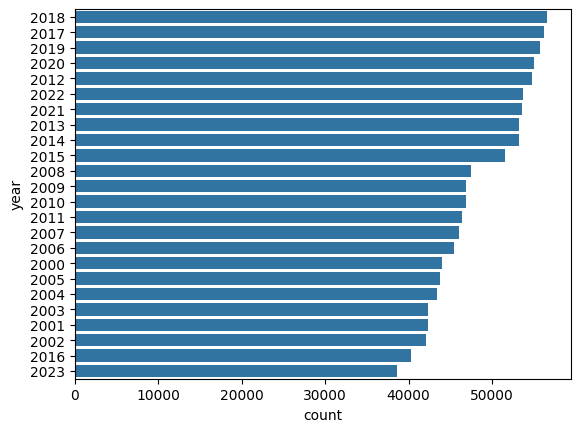

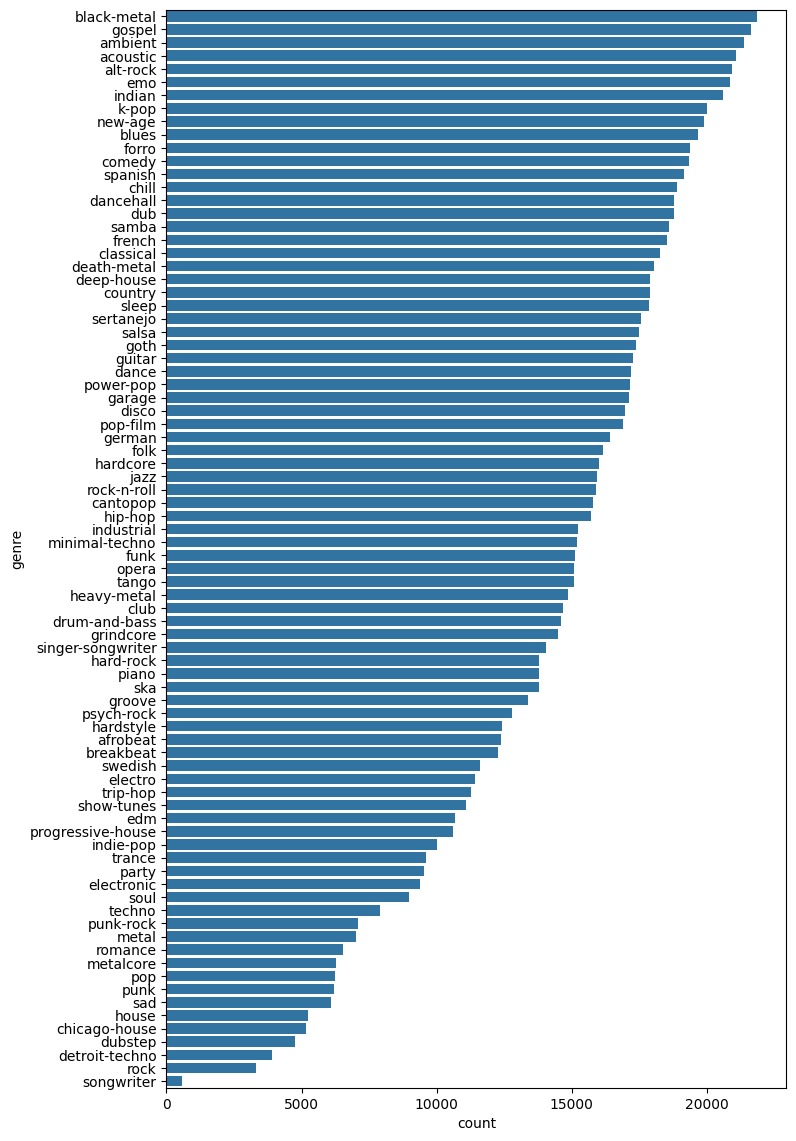

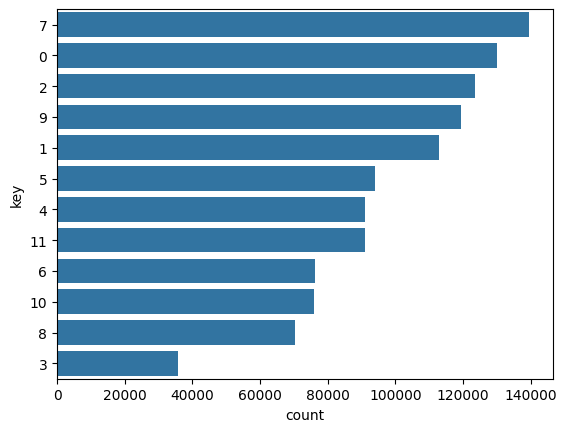

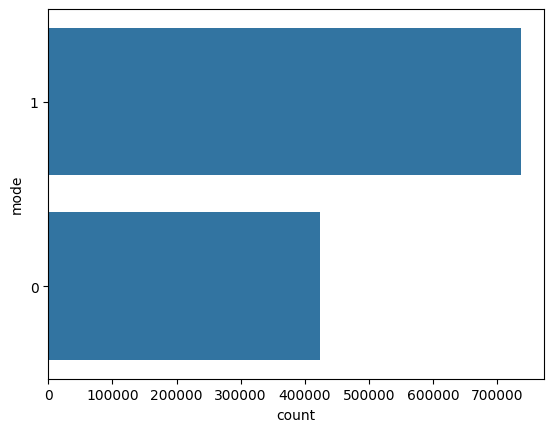

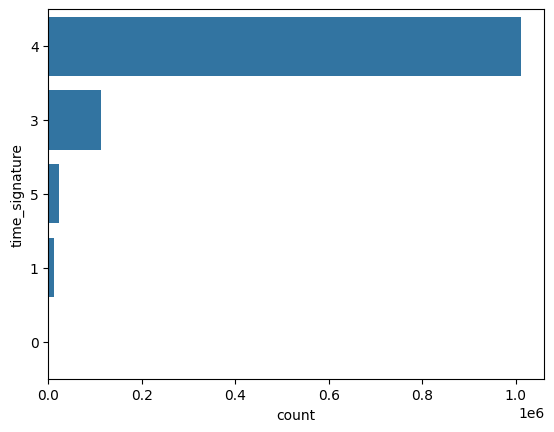

In [ ]:
# Analyze counts for categorical/ordinal features:

# Select categorical/ordinal features
ordinal_features = ['year',
                    'genre',
                    'key',
                    'mode',
                    'time_signature']

# Create Histograms
for feature in ordinal_features:
    if feature == 'genre':
        plt.figure(figsize=(8,14))

    sns.countplot(y = feature,
               data = df_spotify,
               order = df_spotify[feature].value_counts().index
                 )
    plt.show()

**Observations**

There appears to be a well-distributed range of song release years, spanning from 2000 to 2023, with varying counts ranging from approximately 40,000 to 55,000 songs across these years. There is considerable variation in the number of songs across different music genres.There black-metal, gospel, ambient, acoustic, alt-rock, emo, and Indian genres contain over 20,000 songs, while the songwriter, rock, Detroit-techno, and dubstep genres have fewer than 5,000 songs each.

There seems to be some interesting patterns. The majority of songs are found in the 7th, 0th, and 2nd keys, while the 3rd key has the fewest songs. There is a notable contrast in the mode of tracks as the number of songs in Minor almost double the number of songs in Major keys. There is also an overwhelming majority of songs with a time signature of 4.

### Frequencies of Numerical Features

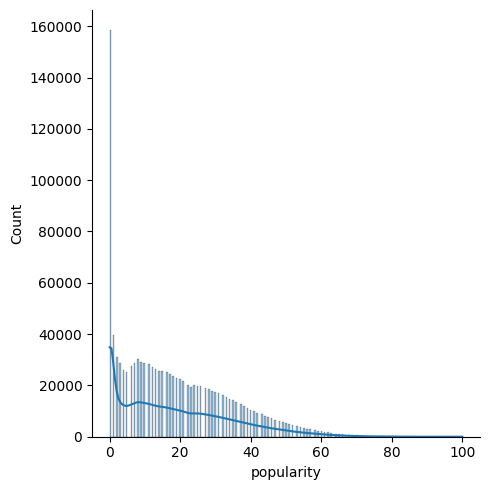

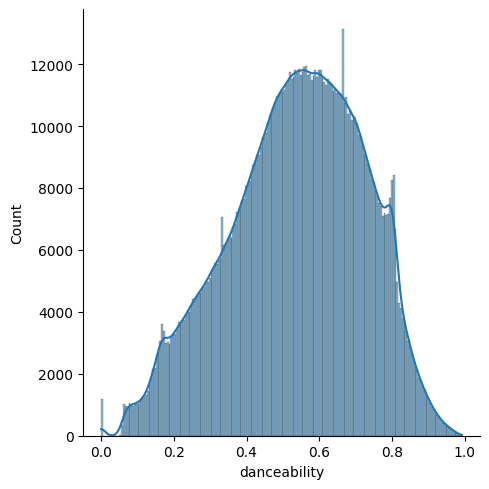

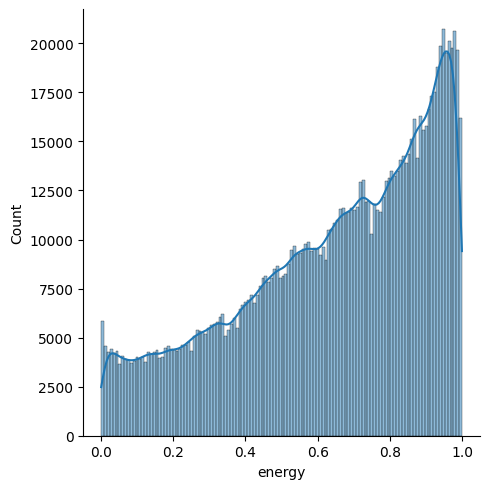

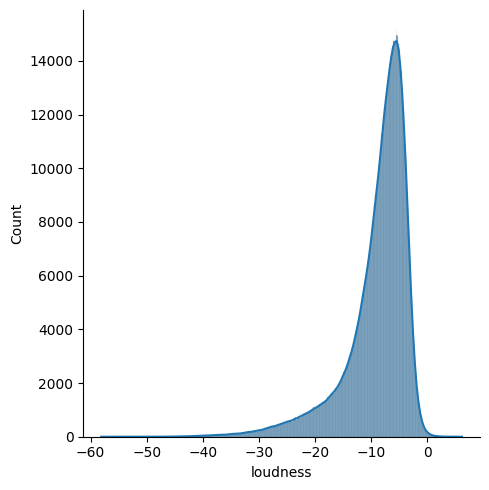

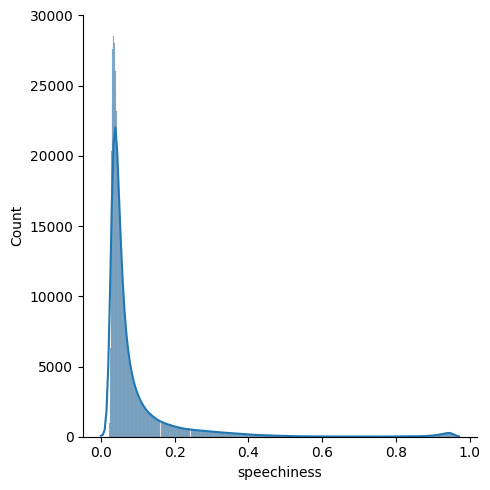

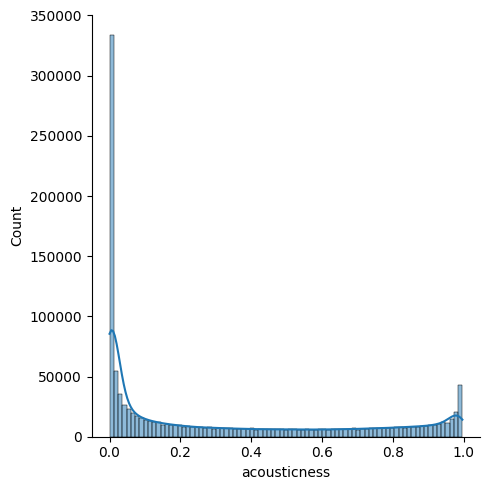

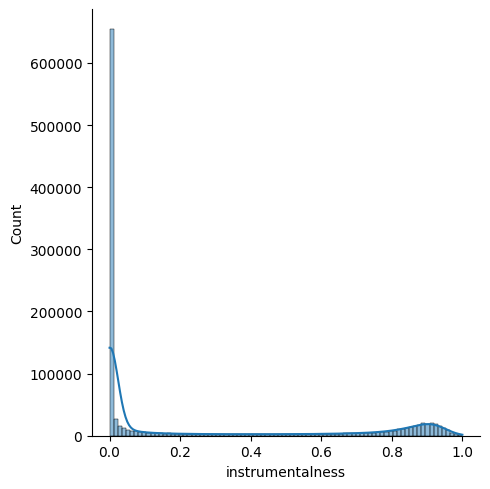

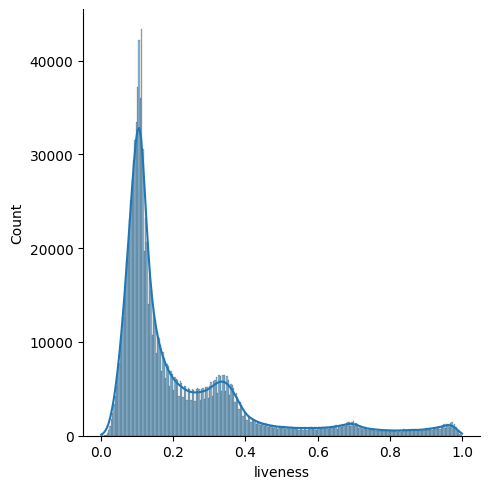

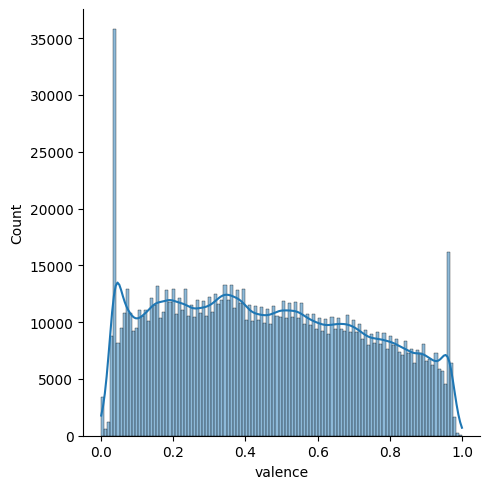

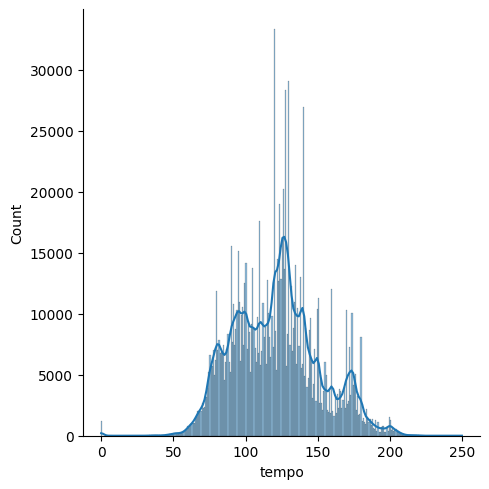

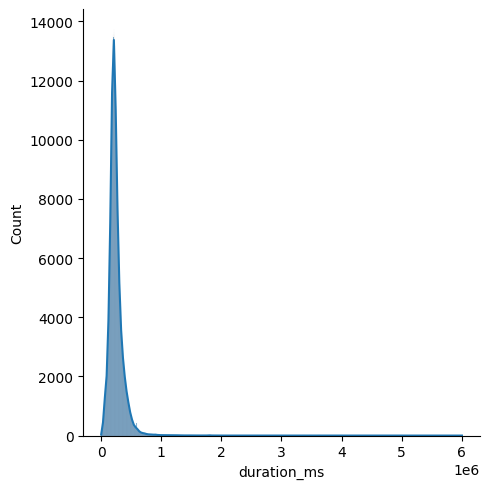

In [ ]:
# Analyze counts for numerical features:

# Select categorical/ordinal features
numerical_features = ['popularity',
                      'danceability',
                      'energy',
                      'loudness',
                      'speechiness',
                      'acousticness',
                      'instrumentalness',
                      'liveness',
                      'valence',
                      'tempo',
                      'duration_ms']

# Create Histograms
for feature in numerical_features:
    sns.displot(df_spotify,
                x = feature,
                kde=True)
    plt.show()


**Observations**

Popularity scores appear to be concentrated around zero, suggesting a positive skewness in the distribution. Danceability scores exhibit a normal distribution, with the majority falling between 0.5 and 0.6. Energy scores display a negative skewness, indicating that as the scores increase from 0 to 1, the frequency of songs tends to rise. Loudness scores center around -5 and show a normal distribution with a slight negative skew. Speechiness scores cluster around zero, forming a normal distribution with a slight positive skew.

Acousticness and instrumentalness scores predominantly hover around zero, with an exceptionally high number of songs scoring exactly zero. Liveness scores peak at around 0.1, and a multimodal distribution is noticeable, with another peak around 0.3. Valence scores exhibit a relatively even distribution, with prominent peaks near 0 and 1.Tempo measures around 125 are most frequent and show a normal distribution. Finally, songs with a duration around 0.5 milliseconds are most common, displaying a normal distribution pattern.

### Outlier Analysis of Numerical Features

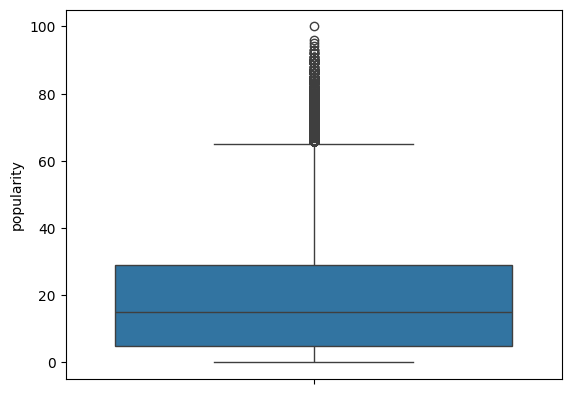

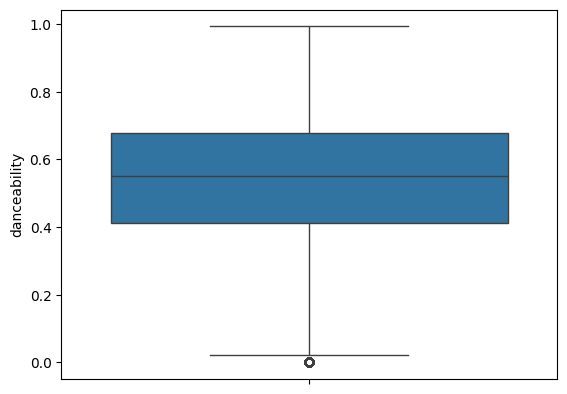

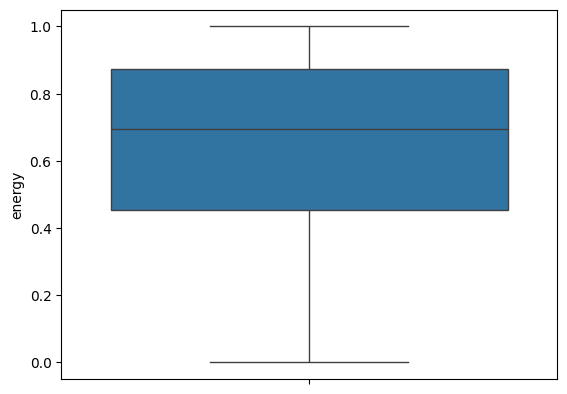

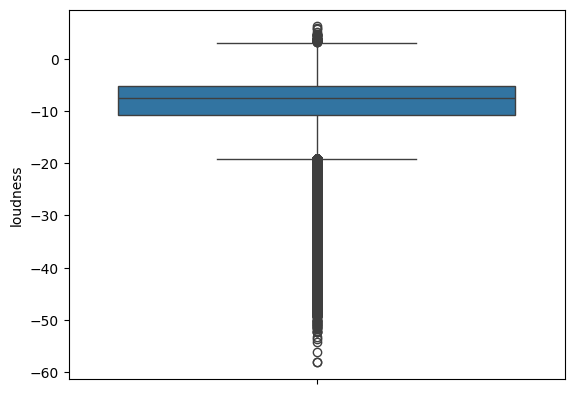

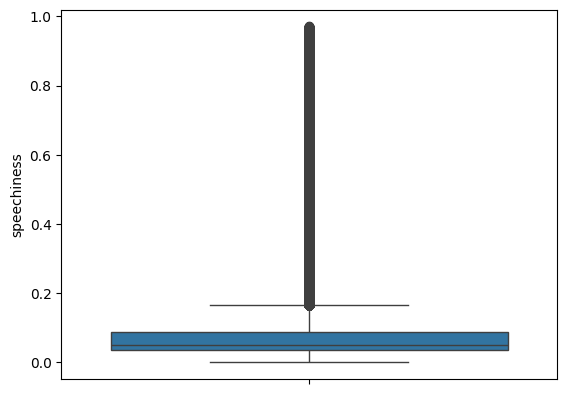

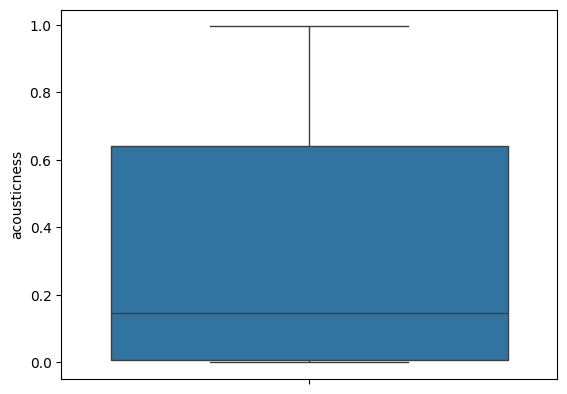

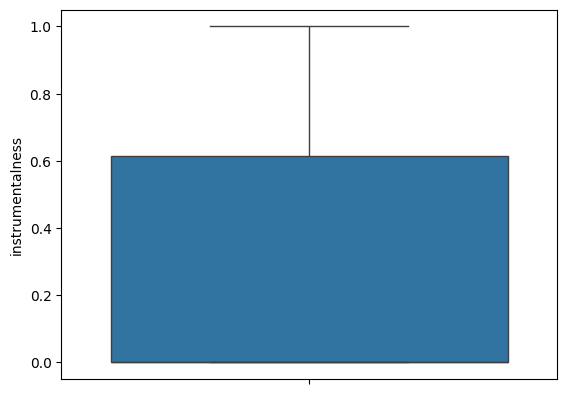

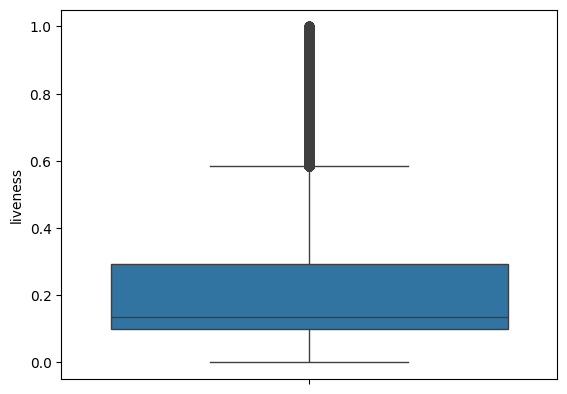

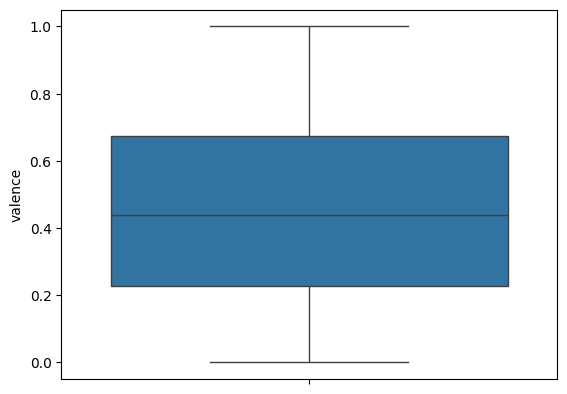

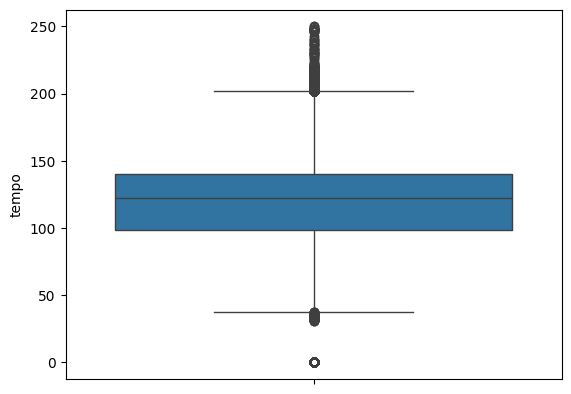

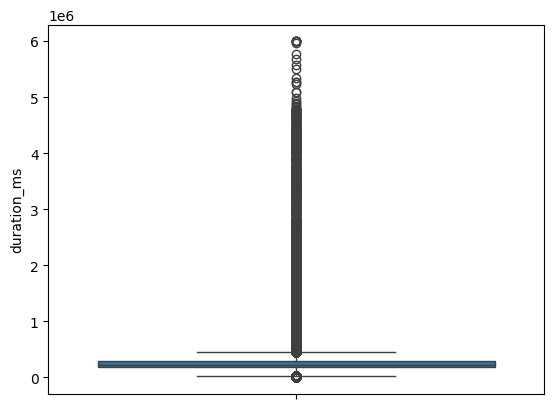

In [ ]:
for feature in numerical_features:
    sns.boxplot(df_spotify, y = feature)
    plt.show()

**Observations**

Some of the numerical variables such as speechiness, duration, liveliness, and so on have many outliers. However, we are not going to remove the outliers for the following reasons:
- Cosine Similarity algorithm is not sensitive to outliers as its functionality is not dependent on the vectors magnitude.
- Since our objective is to recommend songs from the current dataset, we do not want to loose some the songs.
- The whole dataset will be normalized before be feeding into the similarity functions, and this will resolve the outlier issue for many data points.

Thus, we are keeping all the data records regardless of the outliers.

## Correlation Analysis

In [ ]:
#key is a categorical variable
df_spotify['key'].value_counts()

7     139635
0     130081
2     123690
9     119293
1     112806
5      94032
4      91170
11     90955
6      76120
10     76038
8      70206
3      35738
Name: key, dtype: int64

In [ ]:
# popularity is numerical
df_spotify['popularity'].value_counts()

0      158391
1       39820
2       31247
8       30322
9       29249
        ...  
93          3
94          1
96          1
100         1
95          1
Name: popularity, Length: 98, dtype: int64

In [ ]:
# extracting the songs with the 5 most frequent genres
df_genre = df_spotify[df_spotify['genre'].isin(list(df_spotify['genre'].value_counts().head(5).index))]
len(df_genre)

106877

<ipython-input-22-f84e672d9d27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['popularity_bin']= df_genre['popularity'].apply(lambda x: bin(x))


<Axes: xlabel='genre'>

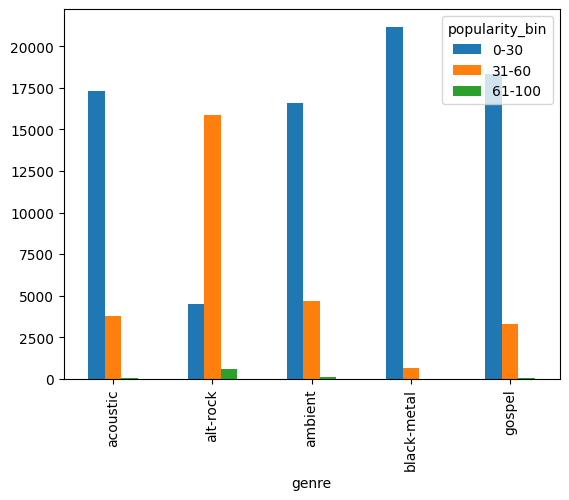

In [ ]:
# Popularity of the the five most frequent genres
def bin(p):
  if p <= 30:
    return '0-30'
  elif p>30 and p<=60:
    return '31-60'
  else:
    return '61-100'

df_genre['popularity_bin']= df_genre['popularity'].apply(lambda x: bin(x))
pd.crosstab(df_genre['genre'], df_genre['popularity_bin']).plot(kind='bar')

<ipython-input-23-5364af5c6c41>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['year_bin']= df_genre['year'].apply(lambda x: bin(x))


<Axes: xlabel='genre'>

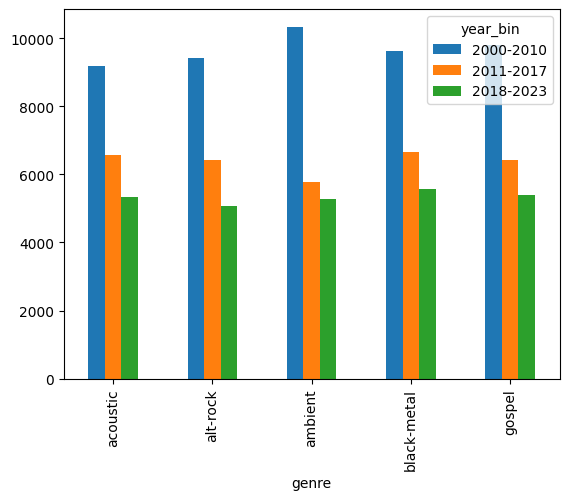

In [ ]:
# Release year of the the five most frequent genres
def bin(y):
  if y <= 2010:
    return '2000-2010'
  elif y>2010 and y<=2017:
    return '2011-2017'
  else:
    return '2018-2023'

df_genre['year_bin']= df_genre['year'].apply(lambda x: bin(x))
pd.crosstab(df_genre['genre'], df_genre['year_bin']).plot(kind='bar')

In [ ]:
print(df_genre['danceability'].max())
print(df_genre['danceability'].min())

0.972
0.0


<Axes: xlabel='genre', ylabel='danceability'>

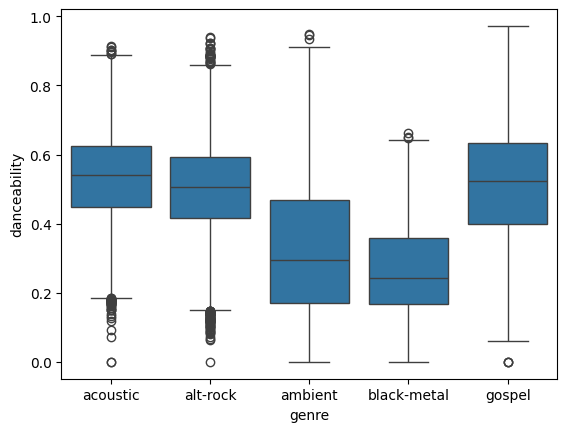

In [ ]:
sns.boxplot(y=df_genre['danceability'], x=df_genre['genre'])

<Axes: xlabel='genre', ylabel='energy'>

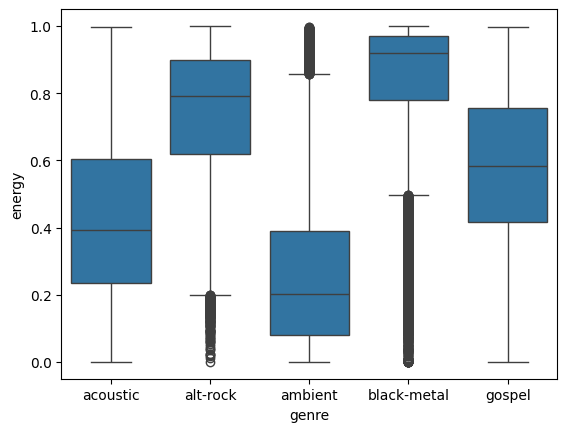

In [ ]:
sns.boxplot(y=df_genre['energy'], x=df_genre['genre'])

In [ ]:
df_num = df_spotify[numerical_features]
hm_df = df_num.corr()

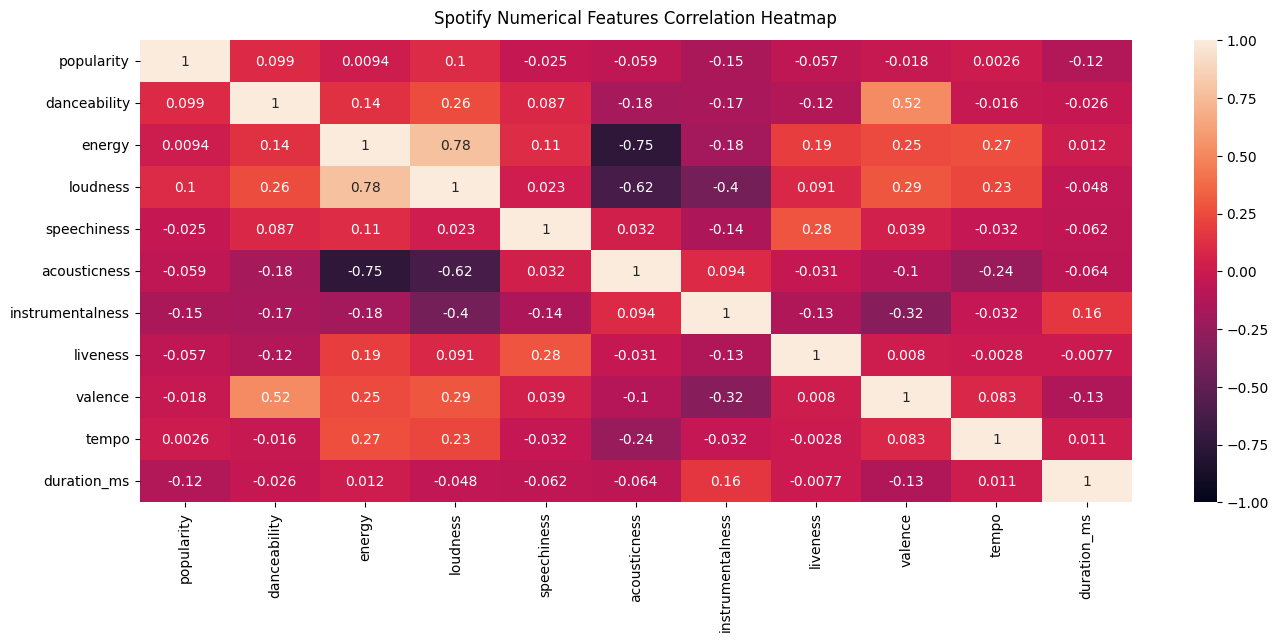

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(hm_df, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Spotify Numerical Features Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df_spotify.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

**Observations**

Some of the interesting facts about the data are as following:
- Among the tracks with the most frequent genre those with genre= "alt-rock" are more popular while those with genre="black-metal" are the less popular ones. This means that genre has a possible relationship with genre. However, further investigations with the whole data is required for a strong conclusion.
- The distribution of genre during time (year) seems to be similar.
- some variables such as danceability and energy are related to genre. This can be considered as an obvious fact about the songs.
- In the correlation matrix of the numerical variables, energy showed a high positive correlation with loudness and a high negative correlation with acousticness.

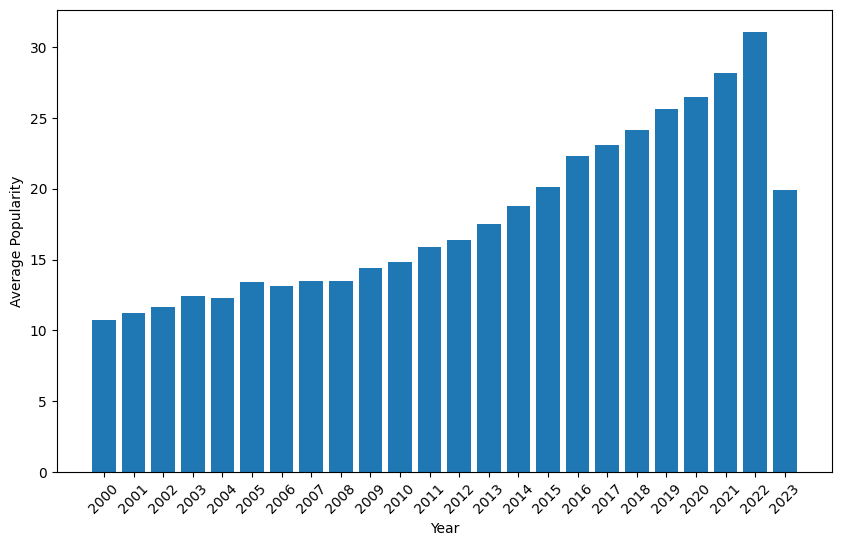

In [ ]:
# Average Popularity of Songs in each Year

df_bar = df_spotify.groupby('year').mean('popularity').reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_bar['year'], df_bar['popularity'])
plt.xlabel("Year")
plt.xticks(df_bar['year'])
plt.xticks(rotation = 45)
plt.ylabel("Average Popularity")
plt.show()

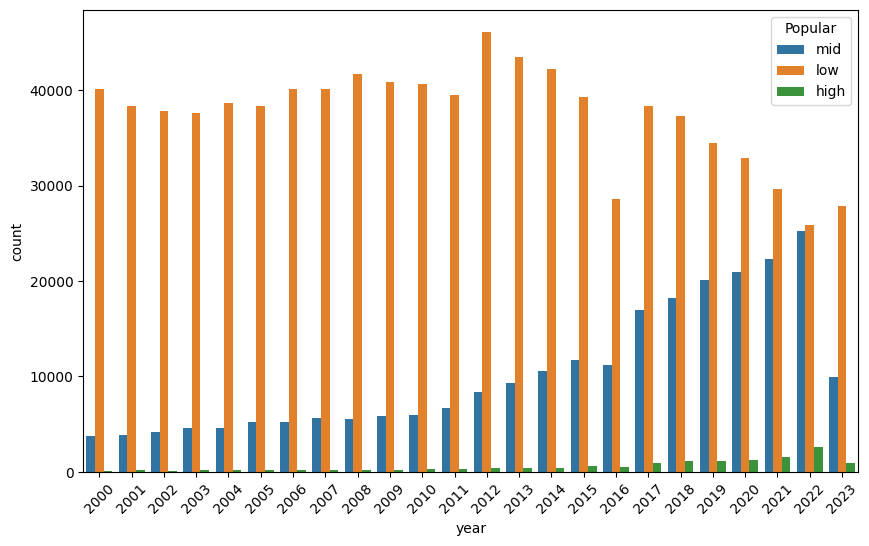

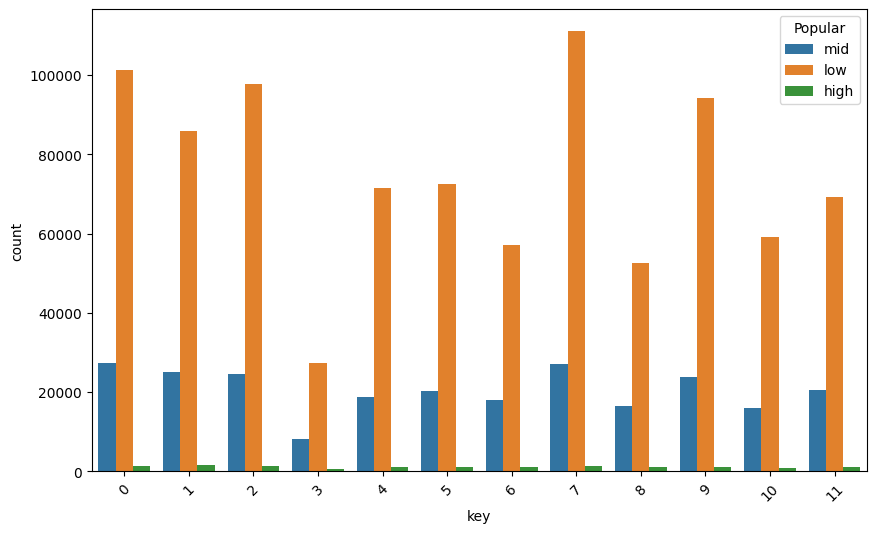

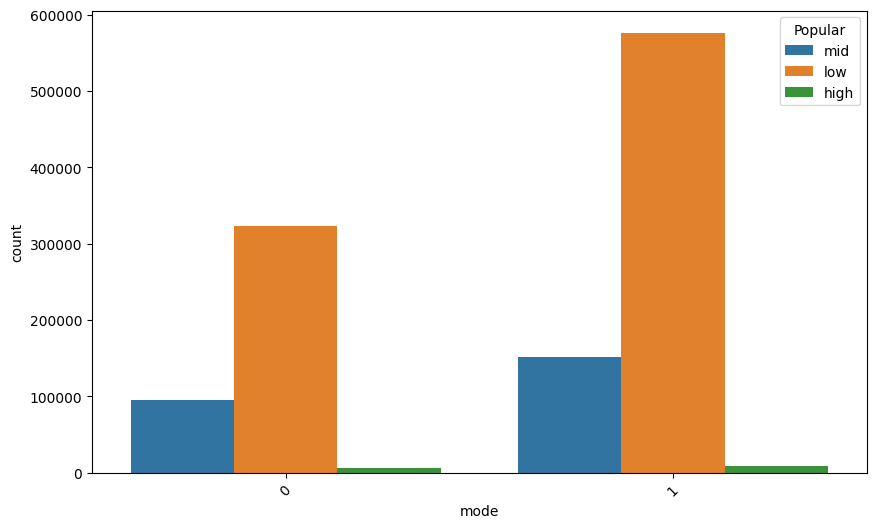

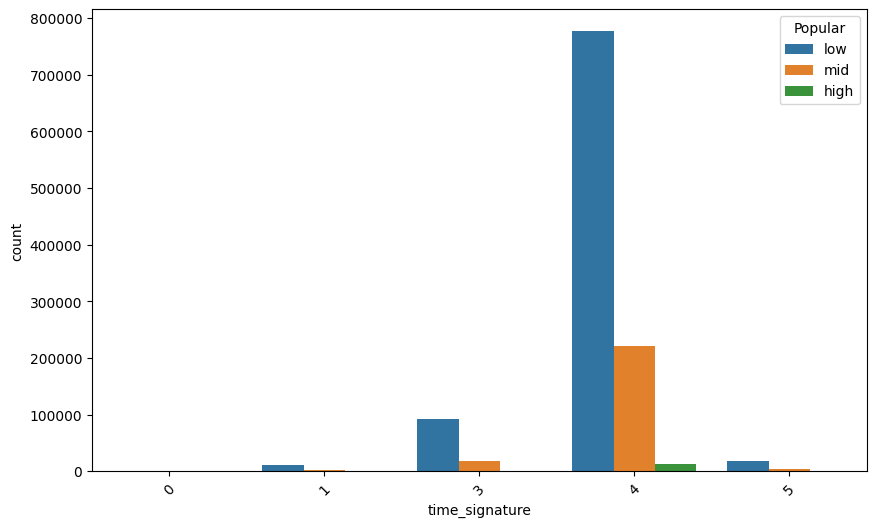

In [ ]:
# Compare the categorical features songs with popularity scores less than 10, 10-20, and over 20
df_popular = df_spotify.copy()

def condition(x):
    if x <= 30:
      return 'low'
    elif x>30 and x<=60:
      return 'mid'
    else:
      return 'high'

df_popular['Popular'] = df_spotify['popularity'].apply(condition)

ordinal_features = ['year',
                    'key',
                    'mode',
                    'time_signature']

for feature in ordinal_features:
  plt.figure(figsize=(10, 6))
  plt.xticks(rotation = 45)
  sns.countplot(df_popular, x = feature, hue = 'Popular')

<ipython-input-32-83f27be15d1c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_average = df_popular.groupby('Popular').mean().reset_index()


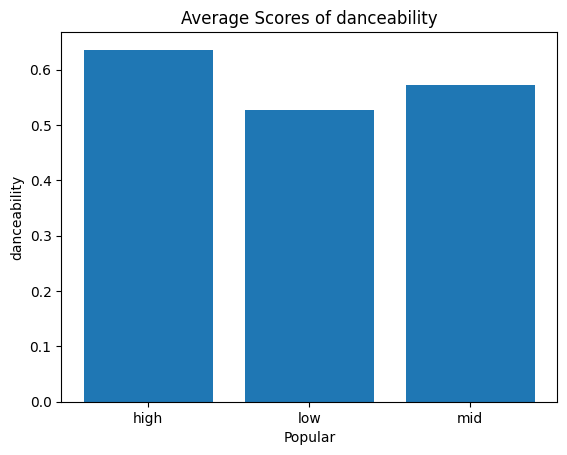

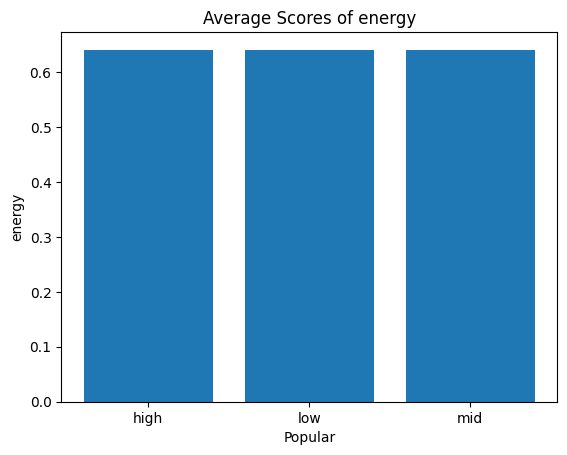

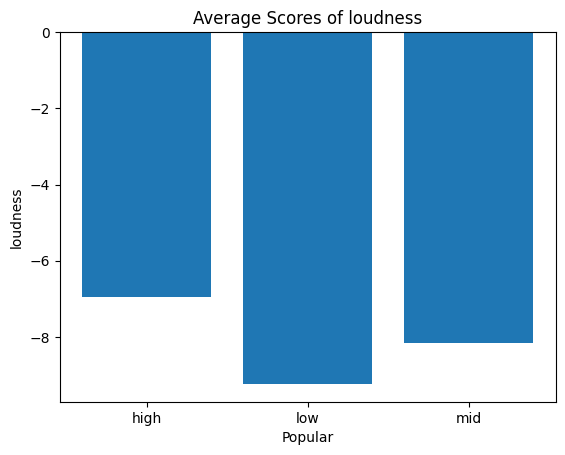

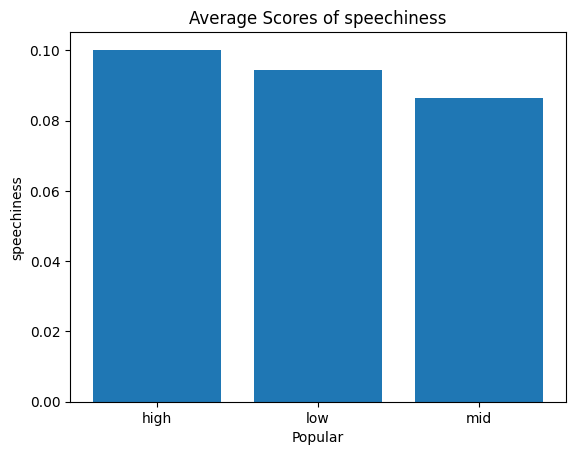

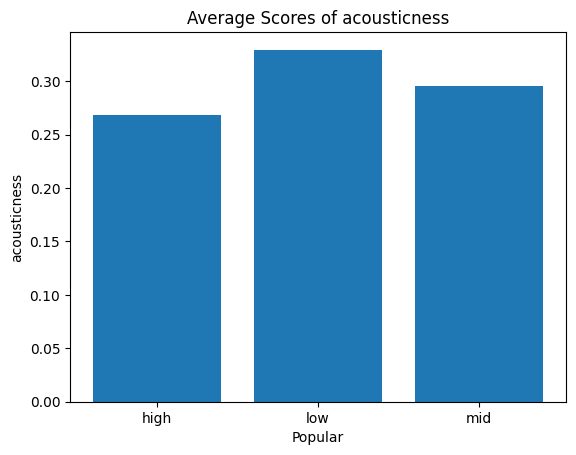

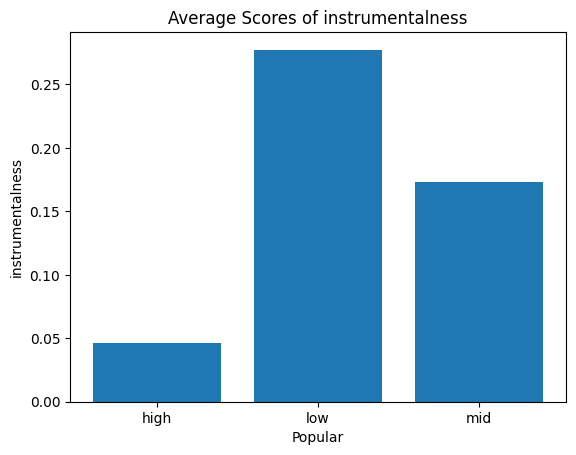

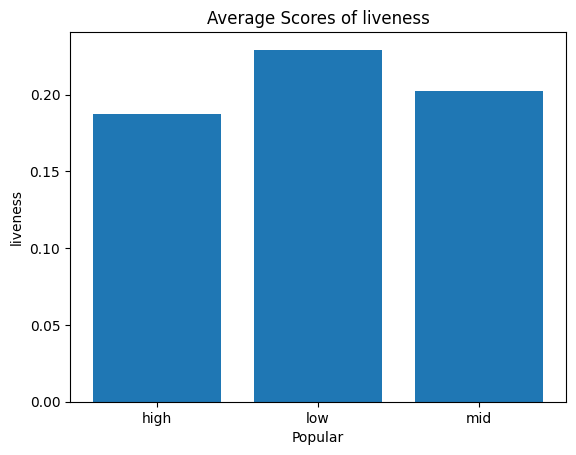

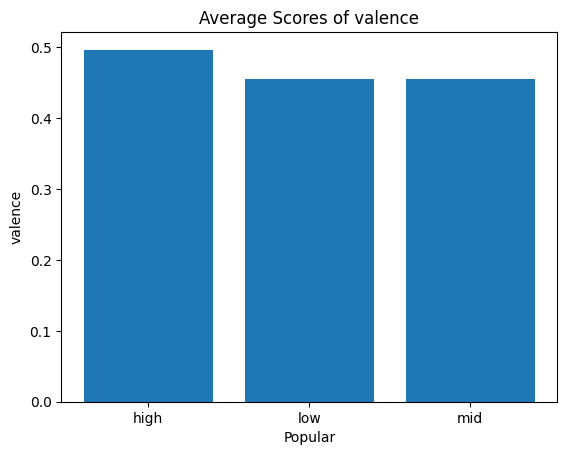

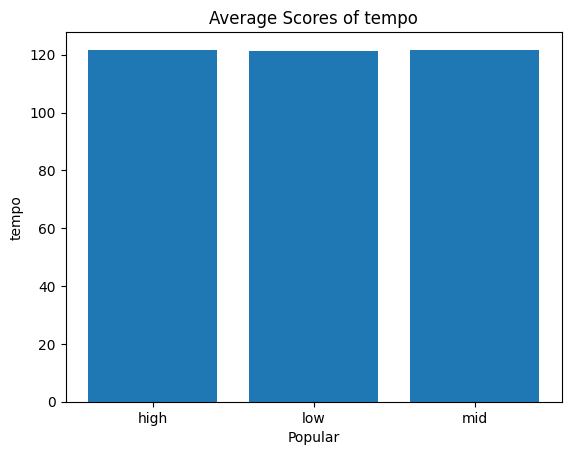

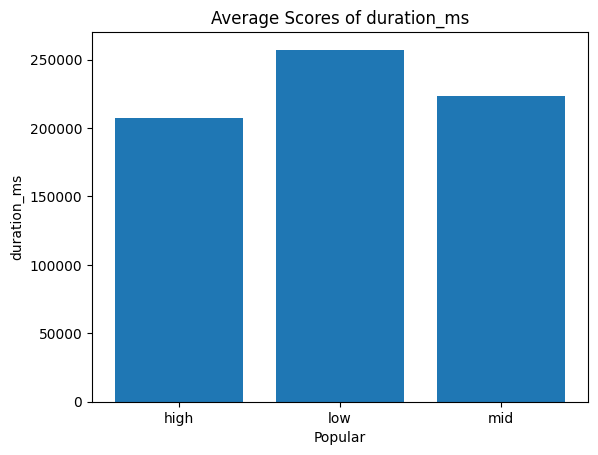

In [ ]:
df_average = df_popular.groupby('Popular').mean().reset_index()

numerical_features = ['danceability',
                      'energy',
                      'loudness',
                      'speechiness',
                      'acousticness',
                      'instrumentalness',
                      'liveness',
                      'valence',
                      'tempo',
                      'duration_ms']

for feature in numerical_features:
  plt.bar(df_average['Popular'], df_average[feature])
  plt.title('Average Scores of ' + feature)
  plt.xlabel('Popular')
  plt.xticks(df_average['Popular'])
  plt.ylabel(feature)
  plt.show()

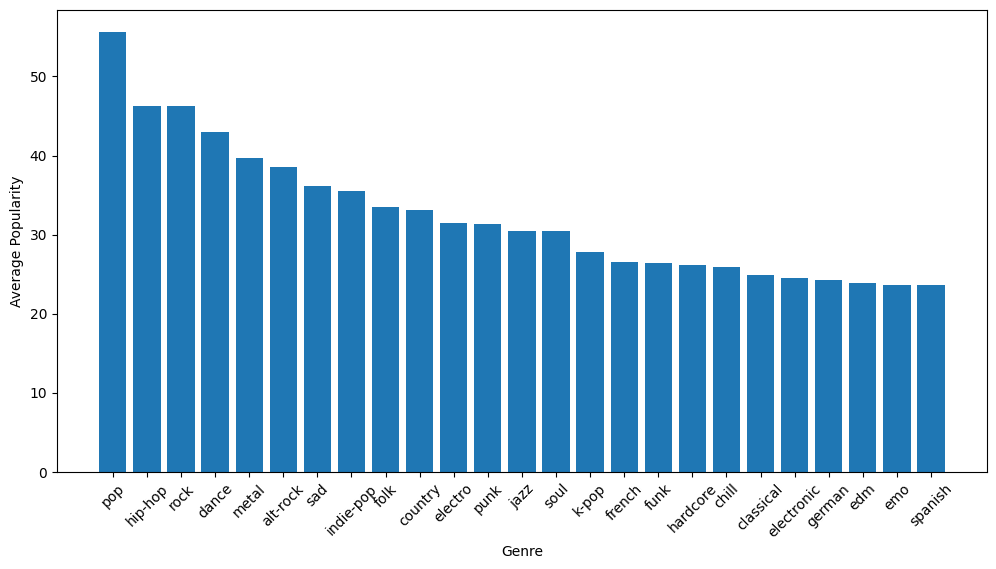

In [ ]:
# 25 Most Popular Genres
df_bar = df_spotify.groupby('genre').mean('popularity').reset_index().sort_values(by = 'popularity', ascending = False).head(25)

plt.figure(figsize=(12, 6))
plt.bar(df_bar['genre'], df_bar['popularity'])
plt.xlabel("Genre")
plt.xticks(df_bar['genre'])
plt.xticks(rotation = 45)
plt.ylabel("Average Popularity")
plt.show()

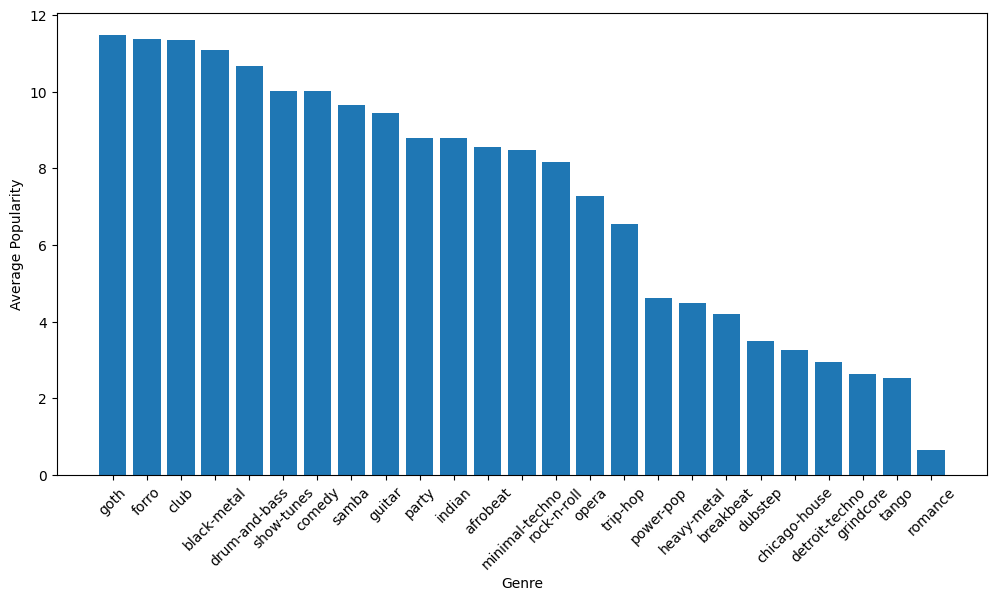

In [ ]:
# 25 Least Popular Genres
df_bar = df_spotify.groupby('genre').mean('popularity').reset_index().sort_values(by = 'popularity', ascending = False).tail(25)

plt.figure(figsize=(12, 6))
plt.bar(df_bar['genre'], df_bar['popularity'])
plt.xlabel("Genre")
plt.xticks(df_bar['genre'])
plt.xticks(rotation = 45)
plt.ylabel("Average Popularity")
plt.show()

**Correlation Analysis Observations**

The five genres with the most songs, acoustic, alt-rock, ambient, black-metal, and gospel were analyzed. Only a small proportion of alt-rock songs exhibited popularity scores exceeding 60, contrasting with the majority of songs in gospel, black-metal, ambient, and acoustic genres, which predominantly fell within the popularity range of 0 to 30. The release patterns over the years were similar across these genres, with a peak between 2000 and 2010 and a decline in releases from 2018 to 2023. Examining the relationship between genre and popularity, it was observed that songs in the "alt-rock" genre tend to be more popular, while those in the "black-metal" genre are less popular. The distribution of these genres over time showed similarities, hinting at possible consistent patterns in the evolution of music genres.

Certain variables, such as danceability and energy, were found to be related to genre, reflecting inherent characteristics of songs within specific genres. In the correlation matrix of numerical variables, a strong positive correlation between energy and loudness was noted, along with a substantial negative correlation with acousticness.

When popularity was categorized into low, medium, and high groups, and their frequencies were analyzed against categorical features like 'year', 'key', 'mode', and 'time_signature', only the 'year' feature exhibited different distributions. Popular songs were more frequent in later years, whereas less popular ones were prevalent in earlier years. When comparing the average scores of numerical features in low, mid, and high popularity groups, their averages remained relatively consistent, suggesting that popularity might not be solely determined by these numerical attributes.

Certain genres stood out with significantly higher average popularity scores, including pop, hip hop, rock, dance, metal, alt-rock, sad, indie pop, and electro punk. Conversely, genres such as romance, tango, grindcore, detroit-techno, chicago-house, dubstep, and breakbeat had notably lower average popularity scores.